# **Bayesian Force Inference for Epithelial Tissue**

Perform MAP estimation of junction tensions and cell pressures based on the force balance relationship at cell vertices.

As presented in:
*   Shuji Ishihara and Kaoru Sugimura.
["Bayesian inference of force dynamics during morphogenesis."](https://www.sciencedirect.com/science/article/pii/S0022519312004316?via%3Dihub)
Journal of Theoretical Biology 313, 201–211 (2012).

*   S. Ishihara, K. Sugimura, S. J. Cox, I. Bonnet, Y. Bellaïche, F. Graner.
["Comparative study of non-invasive force and stress inference methods in tissue."](https://link.springer.com/article/10.1140/epje/i2013-13045-8)
The European Physical Journal E 36, 1–13 (2013).

The Python code is available on [the GitHub page of Ishihara Lab](https://github.com/IshiharaLab/BayesianForceInference).

This Google Colab Notebook was implemented by Xin Yan and Kaoru Sugimura.

Last update: 2025/02/25

# 0. How to use
Test sample:
1. Download files from [Github](https://github.com/Sugimuralab/BayesianForceInference_GoogleColab).
2. Upload them to your Google Drive. Make sure that you put BayesianForceInference.ipynb and lib/ in the same directory (YourDirectory/BayesianForceInference.ipynb, YourDirectory/lib/).
3. Select `InputData-ForceInference/Vertex/VDat_140408-T001.dat` as the input file in step 3.
4. Select `OutputData-ForceInference/' as the output directory in step 4. Alternatively, you can create a new directory and set it as the output directory.
5. Select the directory that you put this notebook, BayesianForceInference.ipynb, as the current working directory in step 5.

Your samples:
1. Download files from XXXX.
2. Upload BayesianForceInference.ipynb and lib/ to your Google drive. Put them in the same directory (YourDirectory/BayesianForceInference.ipynb, YourDirectory/lib/).
3. Prepare an input file in the same format as `InputData-ForceInference/Vertex/VDat_140408-T001.dat`. **GetVertex**, a Fiji/ImageJ plug-in for generating such a file from a segmented image, is available from [Github](https://github.com/Sugimuralab/GetVertexPlugin).
4. Upload the input file to your Google Drive.
5. Select the input file in step 3.
6. Set an output directory of your choice in step 4.
7. Select the directory that you put this notebook, BayesianForceInference.ipynb, as the current working directory in step 5.


#1. Install modules

In [ ]:
!apt-get update
!apt-get install -y build-essential
!apt-get install -y libffi-dev
!apt-get install -y libblas-dev liblapack-dev
!apt-get install -y libsuitesparse-dev

!pip install numpy scipy cffi
!pip install ipyfilechooser

!pip install git+https://github.com/yig/PySPQR.git

Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:10 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:11 http://security.ubuntu.com/ubuntu jammy-security/restricted amd64 Packages [3,657 kB]
Get:12 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [2,634 kB]
Get:13 http://security.ubuntu.com/ubuntu jammy-secur

# 2. Mount your Google Drive
You must re-mount Google Drivein the following cases:
*   Your Colab session is terminated (e.g., inactive for too long).
*   Your internet connection is lost, causing a session reset.
*   You reboot the runtime (e.g., via "Runtime" → "Restart runtime").


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#3. Select input file

In [ ]:
from ipyfilechooser import FileChooser
from IPython.display import display

global selected_file
selected_file = None

# Input file chooser
chooser = FileChooser('/content/drive/MyDrive')
chooser.title = "<b>Select your input file</b>"
chooser.show_only_dirs = False
chooser.use_dir_icons = True

display(chooser)

def set_input_file_path(chooser):
    global selected_file
    selected_file = chooser.selected
    if selected_file:
        print("Selected file:", selected_file)
    else:
        print("No file selected.")

chooser.register_callback(set_input_file_path)

FileChooser(path='/content/drive/MyDrive', filename='', title='<b>Select your input file</b>', show_hidden=Fal…

Selected file: /content/drive/MyDrive/Code-to-Github/BFI-GoogleColab-202502/InputData-ForceInference/Vertex/VDat_140408-T001.dat


#4. Select output directory

In [ ]:
from ipyfilechooser import FileChooser
from IPython.display import display

global selected_out_dir
selected_out_dir = None

# Output directory chooser
out_chooser = FileChooser('/content/drive/MyDrive/')
out_chooser.title = '<b>Select output directory</b>'
out_chooser.show_only_dirs = True
display(out_chooser)

def set_output_dir_path(change):
    global selected_out_dir
    selected_out_dir = out_chooser.selected_path
    if selected_out_dir is not None:
        print("Selected ouput directory:", selected_out_dir)
    else:
        print("No ouput directory is selected")

out_chooser.register_callback(set_output_dir_path)

FileChooser(path='/content/drive/MyDrive', filename='', title='<b>Select output directory</b>', show_hidden=Fa…

Selected ouput directory: /content/drive/MyDrive/Code-to-Github/BFI-GoogleColab-202502/OutputData-ForceInference


#5. Select the current working directory
Select the directory you put this notebook, BayesianForceInference.ipynb.

In [ ]:
from ipyfilechooser import FileChooser
from IPython.display import display

global selected_curr_dir
selected_curr_dir = None

# Current directory chooser
curr_dir_chooser = FileChooser('/content/drive/MyDrive/')
curr_dir_chooser.title = '<b>Select the current working directory</b>'
curr_dir_chooser.show_only_dirs = True
display(curr_dir_chooser)

def set_curr_dir_path(chooser):
    global selected_curr_dir
    selected_curr_dir = chooser.selected_path
    if selected_curr_dir:
        print("Selected current working directory:", selected_curr_dir)
    else:
        print("No working directory selected.")

curr_dir_chooser.register_callback(set_curr_dir_path)

FileChooser(path='/content/drive/MyDrive', filename='', title='<b>Select the current working directory</b>', s…

Selected current working directory: /content/drive/MyDrive/Code-to-Github/BFI-GoogleColab-202502


# 6. Bayesian force inference
If you want to change the scale of the color bar, change tmin = 0.6 and tmax = 1.5 for tension and -0.02, 0.025 for pressure in the last two lines.

Current working directory: /content/drive/MyDrive/Code-to-Github/BFI-GoogleColab-202502

# =======  Load file  ===================
Using output directory: /content/drive/MyDrive/Code-to-Github/BFI-GoogleColab-202502/OutputData-ForceInference
 inputfile  = /content/drive/MyDrive/Code-to-Github/BFI-GoogleColab-202502/InputData-ForceInference/Vertex/VDat_140408-T001.dat
 outputfile = /content/drive/MyDrive/Code-to-Github/BFI-GoogleColab-202502/OutputData-ForceInference/VDat_140408-T001_TP.txt
# =======  Read file  ===================
... Load data from /content/drive/MyDrive/Code-to-Github/BFI-GoogleColab-202502/InputData-ForceInference/Vertex/VDat_140408-T001.dat
CELL_NUMBER =  403
IN_CNUM =  302
R_NUM =  101
E_NUM =  1103

# =======  Generate Matrices  =============
...    Calculate Coefficeint Matrix        
## Either err_ang or err_iso should be zero ( >ERR_MAX= 1.00e-10 ) 
## err_x= 0.000000e+00   err_y= 0.000000e+00   err_ang=  1.111555e-12  err_iso= 0.000000e+00

## constraint     

/content/drive/MyDrive/Code-to-Github/BFI-GoogleColab-202502/lib/EBayesSP.py:117: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  res = minimize_scalar( get_ABIC_for_fmin,  args=pargs, bounds= (0,10), method='bounded', tol=1e-2)


 fmin: 3.819660e+00 8.075112e+01 3.117067e+03
 fmin: 6.180340e+00 9.224424e+01 3.149562e+03
 fmin: 2.360680e+00 6.798439e+01 3.081620e+03
 fmin: 1.458980e+00 5.510311e+01 3.048325e+03
 fmin: 9.016994e-01 4.324452e+01 3.023823e+03
 fmin: 5.572809e-01 3.315460e+01 3.014973e+03
 fmin: 3.444185e-01 2.506833e+01 3.027281e+03
 fmin: 6.437651e-01 3.597058e+01 3.015613e+03
 fmin: 5.483701e-01 3.285133e+01 3.015018e+03
 fmin: 5.723436e-01 3.366141e+01 3.014950e+03
 fmin: 5.690103e-01 3.354988e+01 3.014949e+03
 fmin: 5.656770e-01 3.343800e+01 3.014952e+03
elapsed_time for optimization:6.487096548080444[sec]
# =======  EBayes: MAP estimation  =============
[ 1.07714921  1.00593981  0.94587559 ... -0.00970919  0.03503592
  0.01821754]
Residue = 16.162847 
Results saved to /content/drive/MyDrive/Code-to-Github/BFI-GoogleColab-202502/OutputData-ForceInference/VDat_140408-T001_TP.txt

# =======  Show results  =============

  Draw tensions and pressures   
  ...   Show tensions, saved as  /content/dr

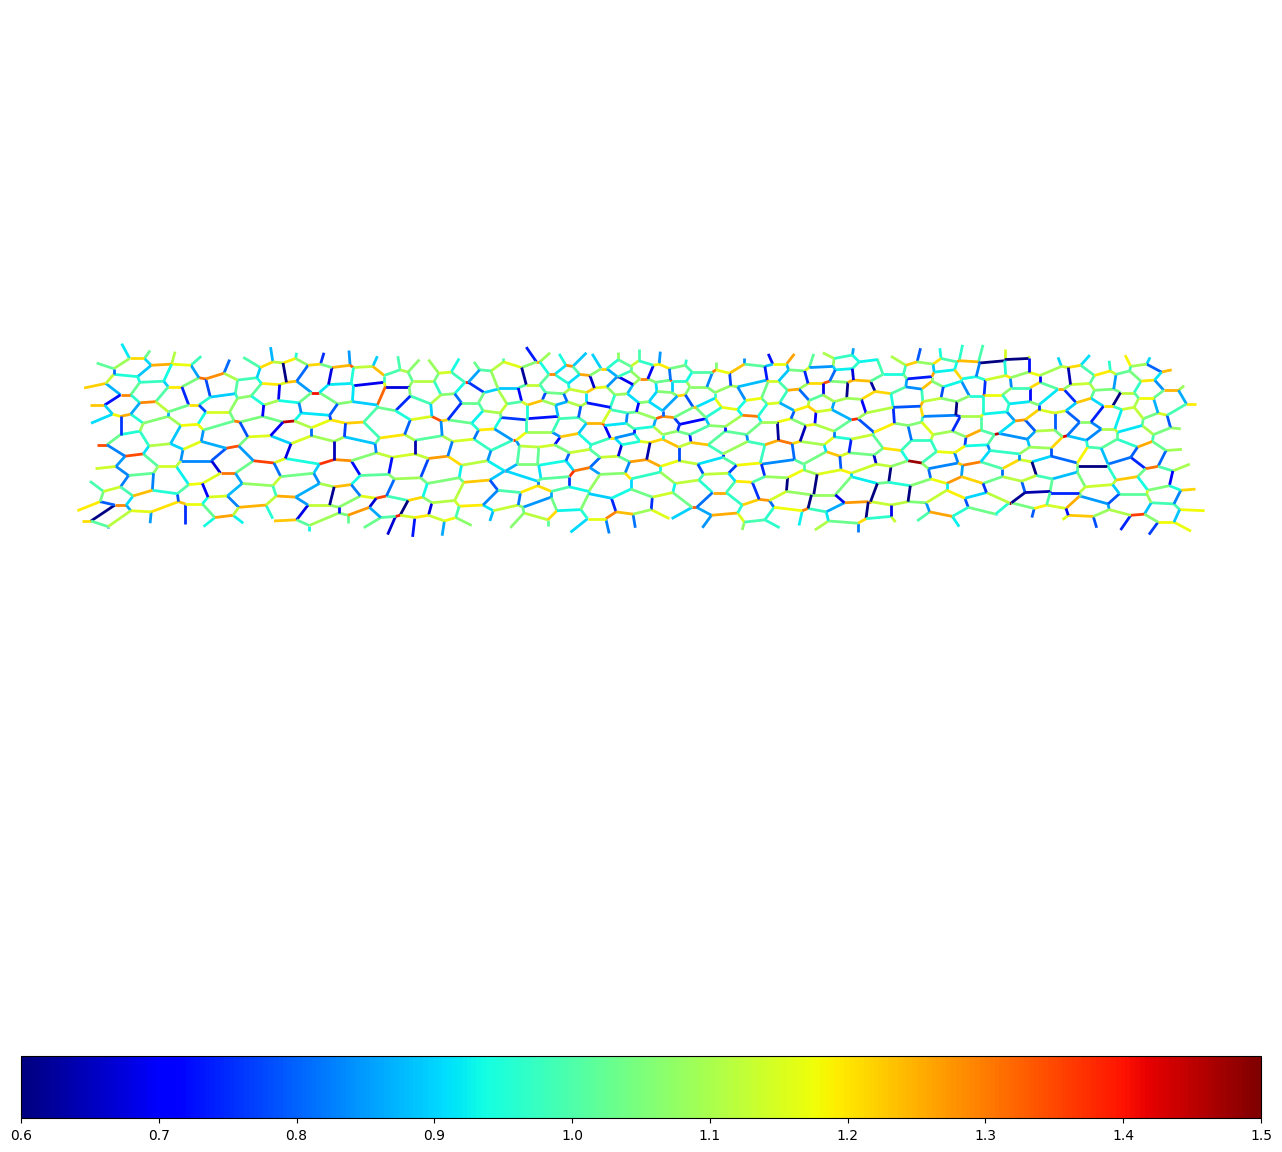

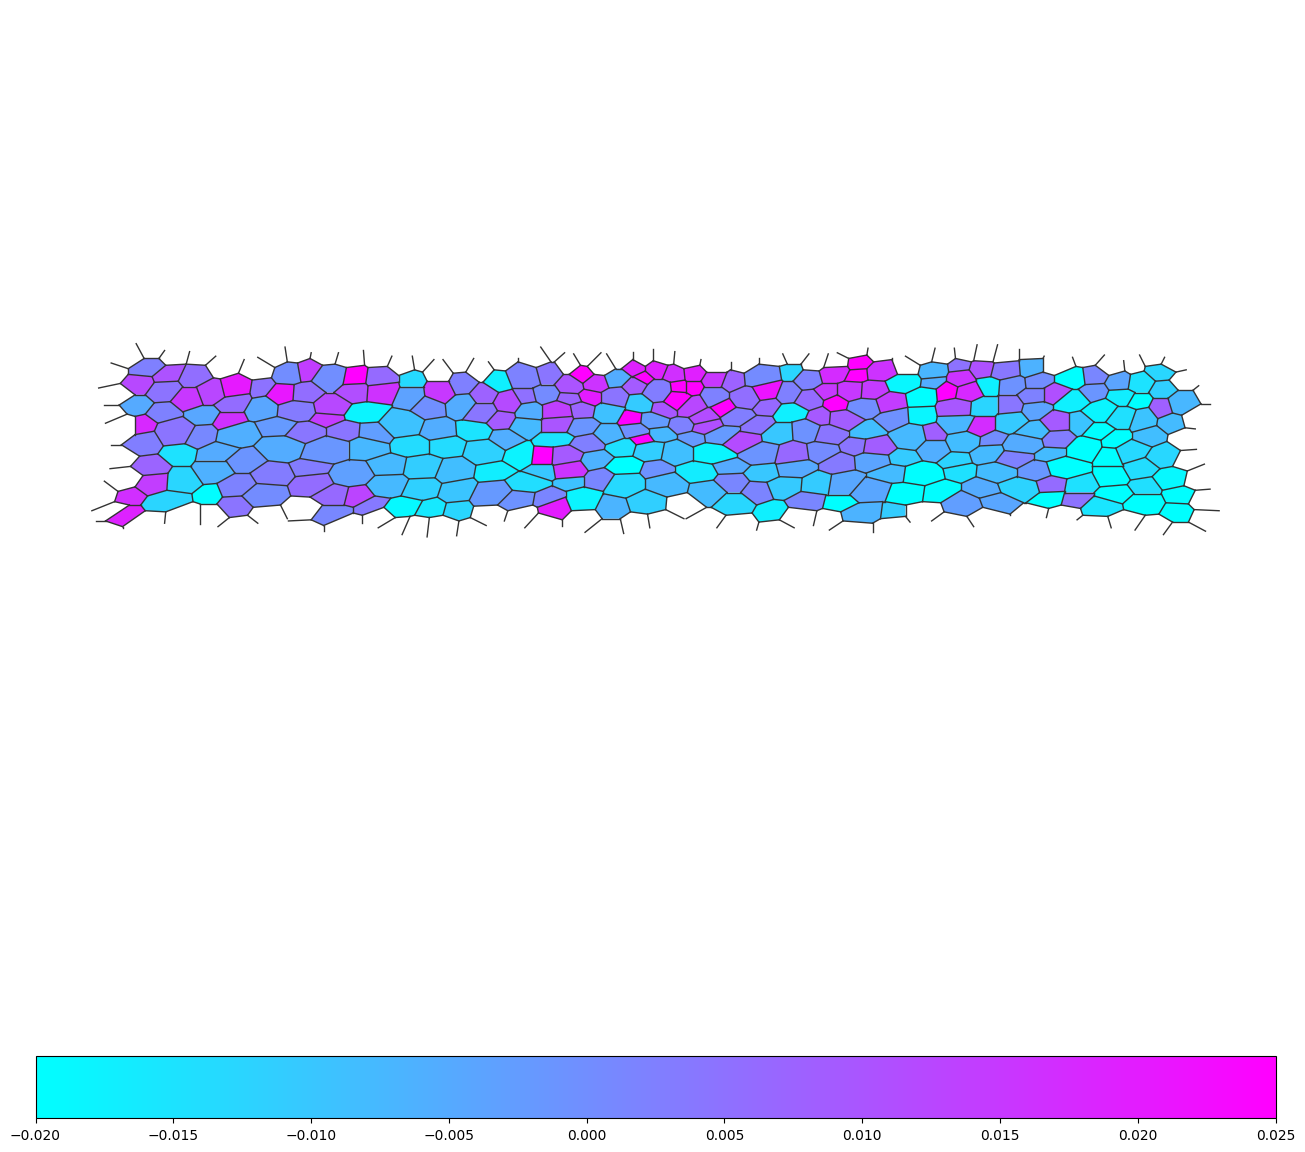

In [ ]:
import os
import sys

## Move to the directory set in step 5
if selected_curr_dir:
    os.chdir(selected_curr_dir)
    print("Current working directory:", os.getcwd())
    sys.path.append(os.getcwd())
else:
    print("Error: No directory selected. Please select the current working directory first.")

## Import the modules
import lib.ForceInf_lib
import lib.Out_lib
import lib.EBayesSP
import lib.OgitaInf_NL as NOgi
import time
import numpy as np
import pandas as pd
import scipy.sparse as sp
import matplotlib.pyplot as plt

print('\n# =======  Load file  ===================')
if 'selected_file' not in globals() or selected_file is None:
    raise ValueError("No input file is selected")

if 'selected_out_dir' not in globals() or selected_out_dir is None:
    raise ValueError("No output directory is selected")

filename = selected_file
base_no_ext = os.path.splitext(os.path.basename(filename))[0]
print("Using output directory:", selected_out_dir)

outhead = os.path.join(selected_out_dir, base_no_ext)
Outfile = outhead + '_TP.txt'
TensionFigure = outhead + '_Tension.png'
PressureFigure = outhead + '_Pressure.png'
print(' inputfile  =', filename)
print(' outputfile =', Outfile)
# print(' tensionfig =', TensionFigure)
# print(' pressurefig=', PressureFigure)

print('# =======  Read file  ===================')
[x,y,edge,cell,Rnd,CELL_NUMBER,E_NUM,V_NUM,INV_NUM,R_NUM,stl,title] = lib.ForceInf_lib.loaddata( filename )
# lib.Out_lib.DrawCells(x,y,edge,cell)  # show cells, for check

print('\n# =======  Generate Matrices  =============')
ERR_MAX = 1.0e-10 # this is used for checking the matrix satisfied momentum and angular momentum conservations
[MM,C_NUM,X_NUM] = lib.ForceInf_lib.GetMatrix_ForceEstimation(x,y,edge,cell,E_NUM,CELL_NUMBER,R_NUM,INV_NUM,Rnd,ERR_MAX,SPARSE=True)

print('## constraint      :  C_NUM= %d   [ 2x(%d) ] ' % (C_NUM, INV_NUM) )
print('## unknown factors :  X_NUM= %d   [ E_NUM+CELL_NUMBER= %d + %d ] ' % (X_NUM,E_NUM,CELL_NUMBER) )
print('## rounding cells  :  R_NUM= %d   ' % (R_NUM) )

HParameter_Number = 2
B0 = sp.spdiags( [1.0]*E_NUM ,0,X_NUM,X_NUM, format="coo")
G = np.hstack( ( np.ones(E_NUM,dtype=float), np.zeros(CELL_NUMBER,dtype=float)) )
V = np.zeros( C_NUM, dtype = np.float64 )

## Empirical Bayesian force inference
print('\n# =======  MAP estimation  =============')
[mu,T,P] = lib.EBayesSP.getTP_by_EBayses(MM,V,B0,G,HParameter_Number,X_NUM,C_NUM,E_NUM,CELL_NUMBER)

## Output
lib.Out_lib.OutputresultsTP(filename,Outfile,x,y,edge,cell,T,P,mu)
print(f"Results saved to {Outfile}")

print('\n# =======  Show results  =============')
print('\n  Draw tensions and pressures   ')
# If you want to change the scale of the color bar, change tmin = 0.6 and tmax = 1.5 for tension and -0.02, 0.025 for pressure.
lib.Out_lib.Draw_Tension(x,y,T,edge,T_LINE_WIDTH = 2.0, tmin = 0.6, tmax = 1.5, savefile = TensionFigure )
lib.Out_lib.Draw_Pressure(x,y,P,edge,cell, -0.02, 0.025, savefile = PressureFigure )

# 7. Calculate the Batchelor stress tensor
Batchelor stress tensor: $ \sigma = \frac{1}{A} \left( -\sum_i P_i A_i \mathbf{I} + \sum_{[ij]} T_{ij} \frac{\mathbf{r}_{ij} \otimes \mathbf{r}_{ij}}{|\mathbf{r}_{ij}|} \right) $

In [ ]:
A = np.array([cell[i].area for i in range(len(cell))])
A_all = np.sum(A)
r = np.array([[edge[i].dx, edge[i].dy] for i in range(E_NUM)])
T = np.array ([T[i] for i in range(E_NUM)])

I = np.eye(2)
P_term = -sum(P_i * A_i for P_i, A_i in zip(P, A)) * I
T_term = sum(T_ij * np.outer(r_ij, r_ij) / np.linalg.norm(r_ij) for T_ij, r_ij in zip(T, r))
stress_tensor = (P_term + T_term) / A_all

print("Stress tensor: ")
print(stress_tensor)

sigma_xx = stress_tensor[0,0]
sigma_yy = stress_tensor[1,1]
sigma_A = sigma_xx - sigma_yy

# Save results to a text file
output_data = [
    f"Data: {selected_file}",
    f"Stress tensor: {stress_tensor}",
    f"sigma_xx - sigma_yy: {sigma_A}",
]

outhead = os.path.join(selected_out_dir, base_no_ext)
Outfile = outhead + '_stress.txt'

with open(Outfile, "w") as f:
    for line in output_data:
        f.write(line + "\n")

print(f"Results saved to {Outfile}")

Stress tensor: 
[[0.06851574 0.0035389 ]
 [0.0035389  0.03222954]]
Results saved to /content/drive/MyDrive/Code-to-Github/BFI-GoogleColab-202502/OutputData-ForceInference/VDat_140408-T001_stress.txt
